<a href="https://colab.research.google.com/github/pritesh2292/Netflix-Movies-Tv-Shows-Clustering/blob/main/Netflix_unsupervised_ML_capstone_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing LIabraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

import seaborn as sns #importing our visualization library
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Dataset Loading

In [2]:
# Load Dataset
# mount the drive on colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read the data
path = "/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
df = pd.read_csv(path)

Dataset first look

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


checking for null values

In [6]:
 df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Heatmap 

<Axes: >

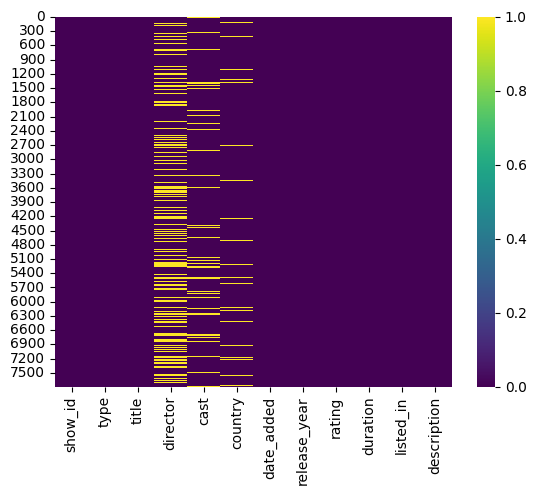

In [7]:
sns.heatmap(df.isnull(),cmap = 'viridis')

We have null values in director, cast,country,date_added and rating.So lets deal with it.

In [8]:
df['rating'].value_counts().unique()

array([2863, 1931,  806,  665,  386,  280,  271,  247,  194,   84,   39,
          6,    5,    3])

In the above data, we can choose to drop the director and cast columns completely as they are not a huge part for us while we visualize the data and they dont add any significant value to our analysis. We are only focused on visualizing this data hence dropping two columns wont be any trouble for us.But this should not be a regular practise as if we are making a recommender system, we cannot drop the director and cast of a movie as these are a key feature used to recommend movies to users



In [9]:
df.drop(['director','cast'],axis = 1,inplace = True)

In [10]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


We replaced all the Nan values in the country column with United States as Netflix was created in the USA and every show is aired on Netflix US. So instead of dropping the whole column we just replaced the values in it in order to save our data.

In [11]:
df['country'].replace(np.nan, 'United States',inplace  = True)

We already have released year for each movie and hence even if we dont have released date,it wont affect our analsis much. Hence we can Drop released date column.

In [12]:
df.drop(['date_added'],axis =1,inplace = True)

In [13]:
df.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [14]:
df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [15]:
df['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

As we can see we only have 10 missing values in our rating column, we can either drop them or replace them. We have TV-MA which is the most common raing and hence we can replace all these nan values with TV-MA.

In [18]:
df['rating'].replace(np.nan, 'TV-MA',inplace  = True)

In [19]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

We have now dealt with all of our missing data so lets get started with our data visualization

In [20]:
df.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


<Axes: xlabel='type', ylabel='count'>

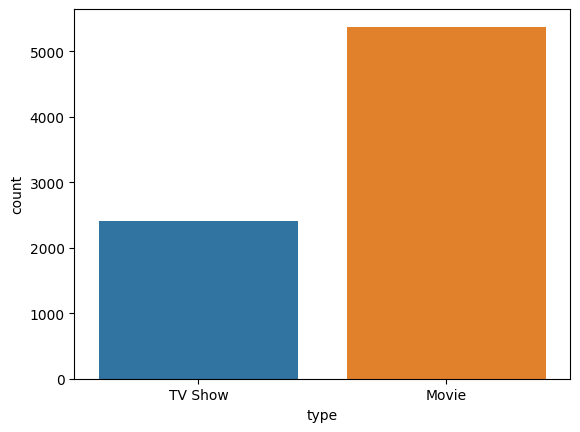

In [21]:
sns.countplot(x='type',data = df) #looking at number of Movies and TV shows

<Axes: xlabel='rating', ylabel='count'>

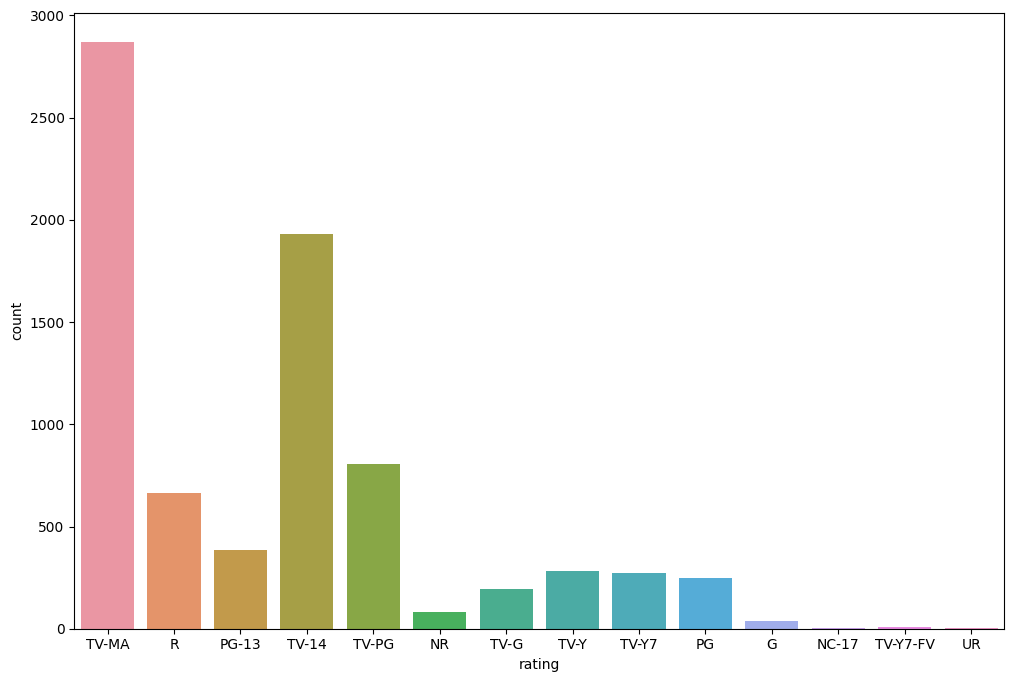

In [22]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df)

<Axes: xlabel='release_year', ylabel='count'>

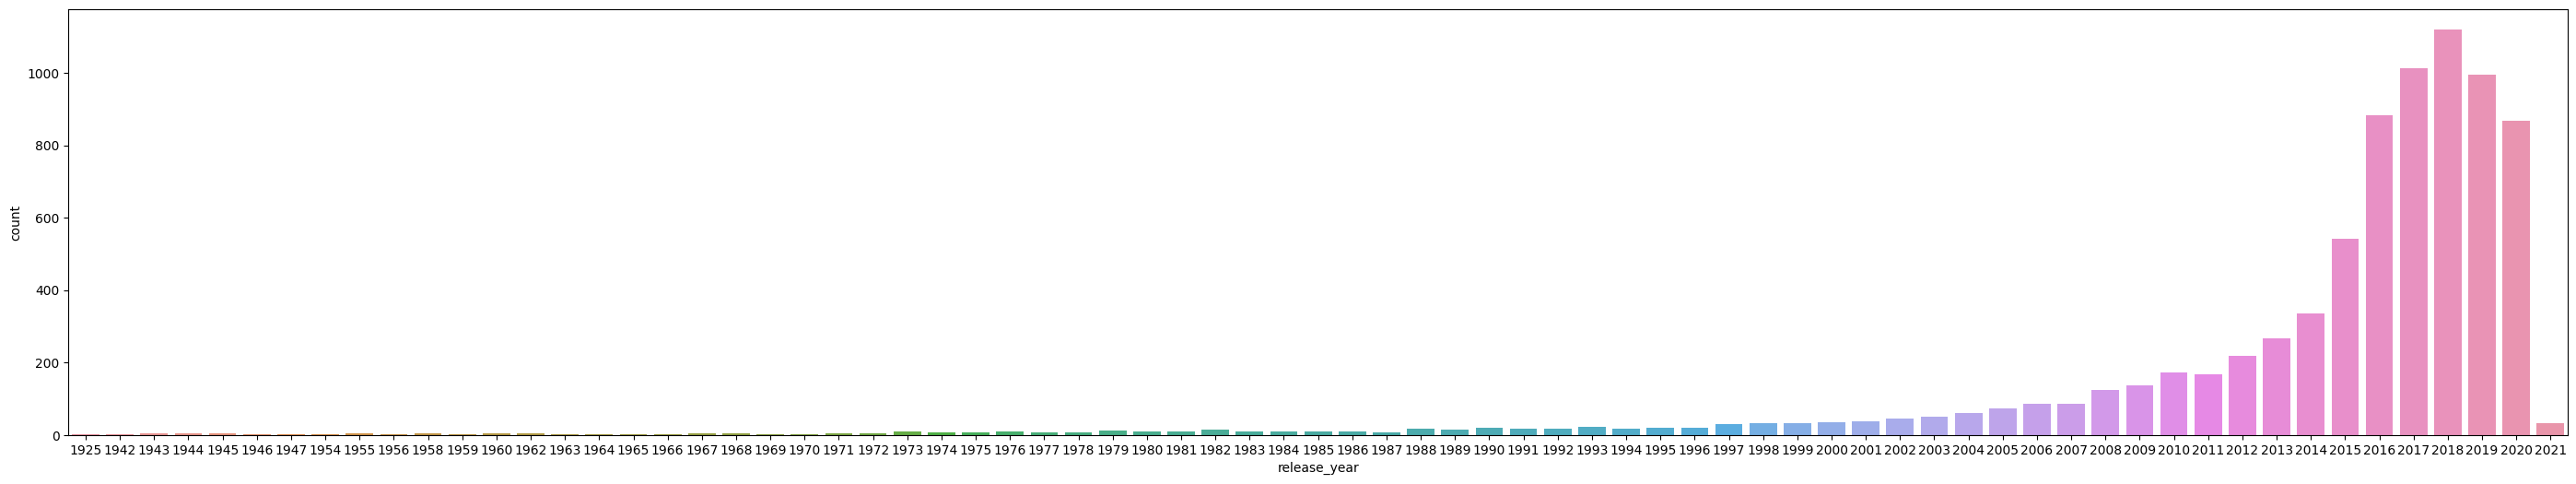

In [23]:
plt.figure(figsize = (35,6))
sns.countplot(x='release_year',data = df)

As we can see most of the Movies and Tv shows on Netflix are Released in the past decade and very few were released earlier

<Axes: xlabel='rating', ylabel='type'>

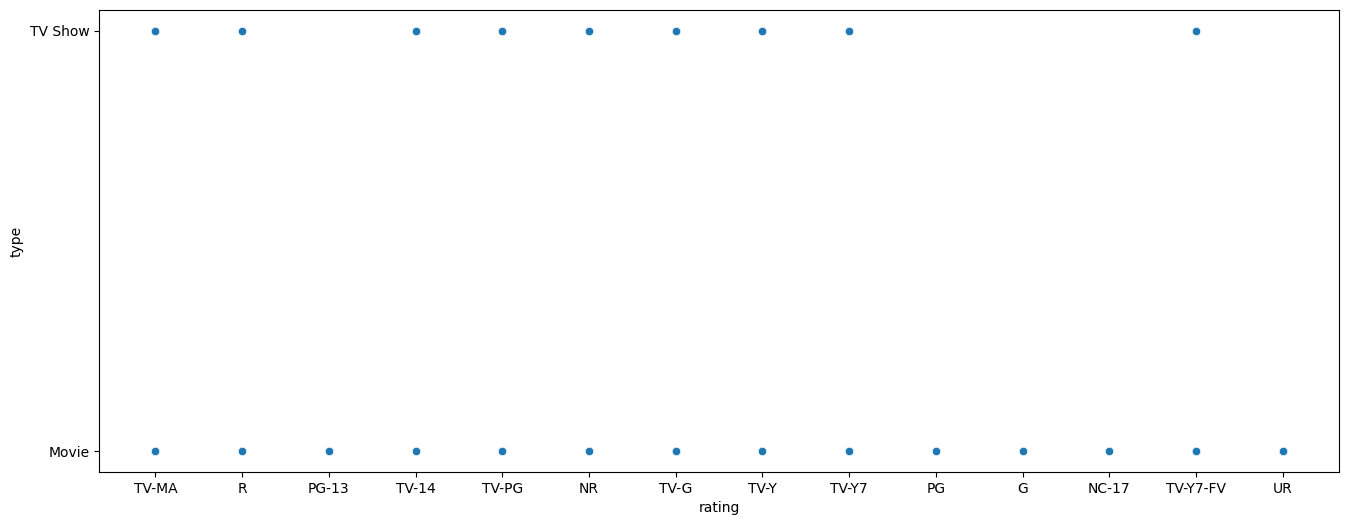

In [24]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='rating',y='type',data = df) #analysing the type, whether its a movie or a movie v/s the rating it has

<Axes: xlabel='rating', ylabel='count'>

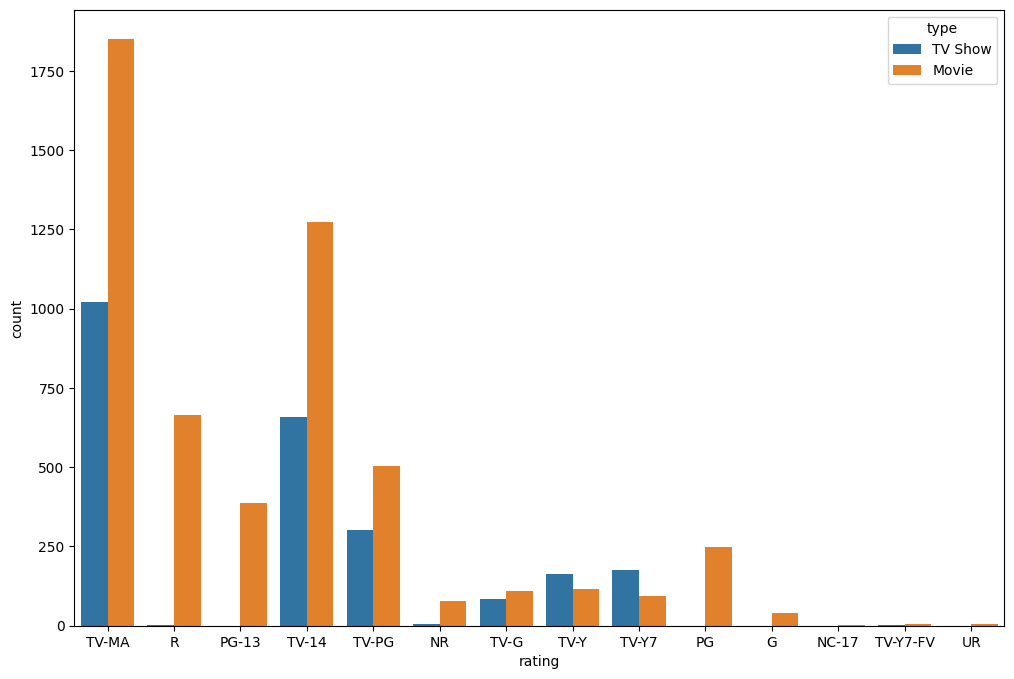

In [25]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df,hue='type')

In [26]:
import plotly.express as px #distribution according to countries
top_rated=df[0:10]
fig =px.sunburst(top_rated,path['country'])
fig.show()

TypeError: ignored